## Import Necessary Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import warnings

# Suppress warning messages
warnings.filterwarnings("ignore")

## Read The Data

### About Dataset
This dataset provides insights into data engineer salaries and employment attributes for the year 2024. It includes information such as salary, job title, experience level, employment type, employee residence, remote work ratio, company location, and company size.

The dataset allows for analysis of salary trends, employment patterns, and geographic variations in data engineering roles. It can be used by researchers, analysts, and organizations to understand the evolving landscape of data engineering employment and compensation.

### Feature Description

- **work_year**: The year in which the data was collected (2024).
- **experience_level**: The experience level of the employee, categorized as SE (Senior Engineer), MI (Mid-Level Engineer), or EL (Entry-Level Enginner)
- **employment_type**: The type of employment, such as full-time (FT), part-time (PT), contract (C), or freelance (F).
- **job_title**: The title or role of the employee within the company, for example, AI Engineer.
- **salary**: The salary of the employee in the local currency (e.g., 202,730 USD).
- **salary_currency**: The currency in which the salary is denominated (e.g., USD).
- **salary_in_usd**: The salary converted to US dollars for standardization purposes.
- **employee_residence**: The country of residence of the employee.
- **remote_ratio**: The ratio indicating the extent of remote work allowed in the position (0 for no remote work, 1 for fully remote).
- **company_location**: The location of the company where the employee is employed.
- **company_size**: The size of the company, often categorized by the number of employees (S for small, M for medium, L for large).

In [102]:
data = pd.read_csv("data/salaries.csv")

data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


## Sanity Check of Data

In [103]:
# to get the data types or column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [104]:
# to get the shape of data
data.shape

(16534, 11)

In [105]:
# to get the number of missing values
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [106]:
# find duplicates
data.duplicated().sum()

6421

In [107]:
# identifing garbage values
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("***" * 10)

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64
******************************
employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64
******************************
job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64
******************************
salary_currency
USD    15294
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
DKK        4
JPY        4
TRY        3
HUF        3
ILS        2
NOK        2
THB        2
NZD        1
PHP      

## Exploratory Data Anlaysis (EDA)

In [108]:
# descriptive statistics
numerical_summary = data.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
work_year,16534.000000,2023.226866,0.713558,2020.000000,2023.000000,2023.000000,2024.000000,2024.000000
salary,16534.000000,163726.962683,340205.744183,14000.000000,101763.000000,142200.000000,187200.000000,30400000.000000
salary_in_usd,16534.000000,149686.777973,68505.293156,15000.000000,101125.000000,141300.000000,185900.000000,800000.000000
remote_ratio,16534.000000,32.003750,46.245158,0.000000,0.000000,0.000000,100.000000,100.000000


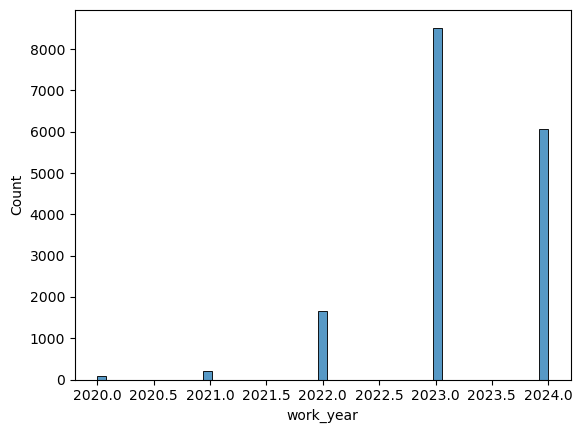

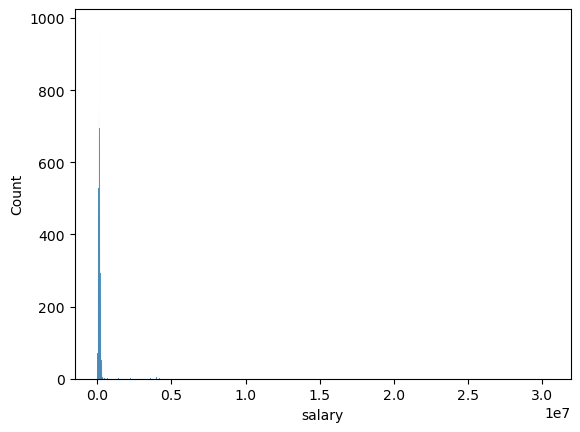

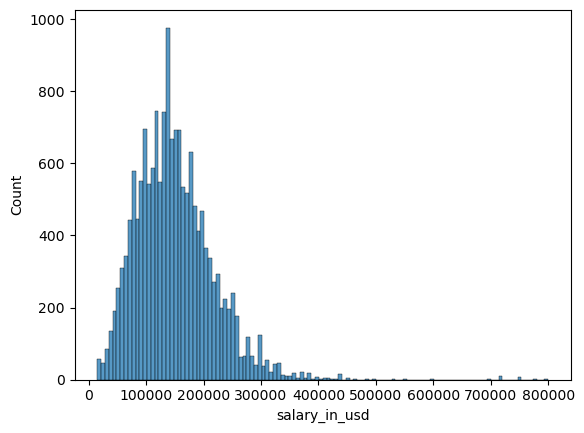

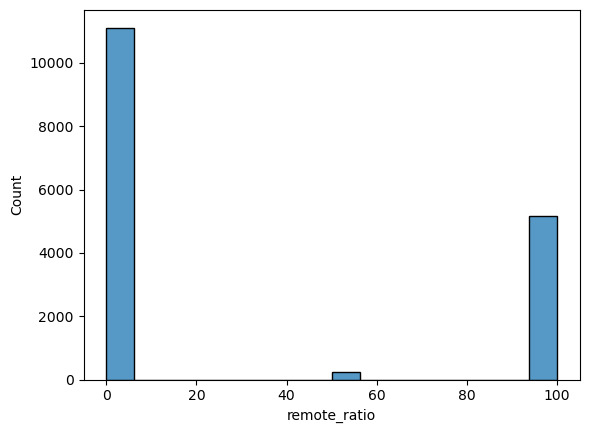

In [109]:
# histogram to understand the distribution
for i in data.select_dtypes(include="number").columns:
	sns.histplot(data=data, x=i)
	plt.show()

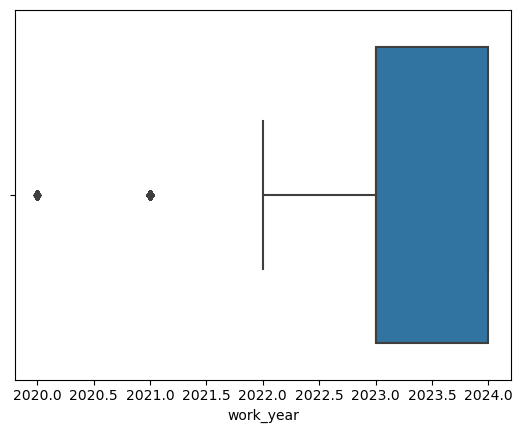

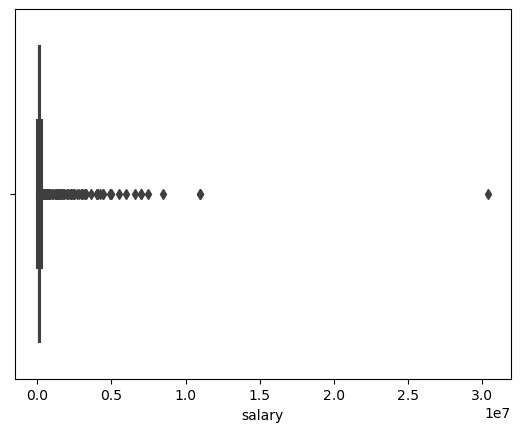

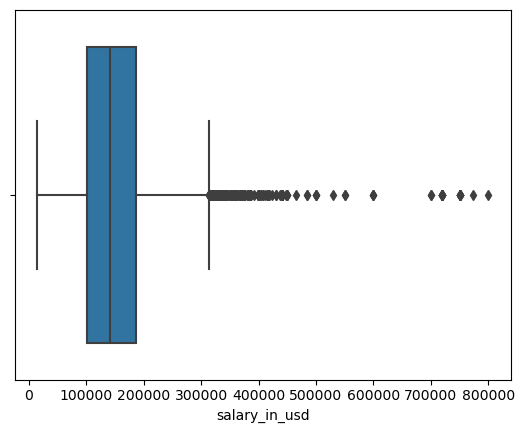

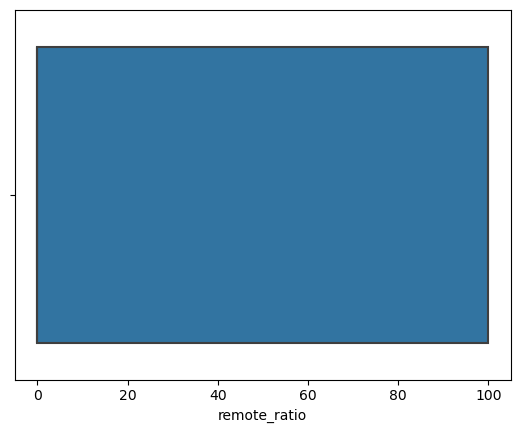

In [110]:
# boxplot to identify outliers
for i in data.select_dtypes(include="number").columns:
	sns.boxplot(data=data, x=i)
	plt.show()

## Duplicates & Garbage value treatments

In [111]:
data = data.drop_duplicates()

data.shape

(10113, 11)

## Outliers Treatments

In [112]:
max_limit = data.salary_in_usd.mean() + 2 * data.salary_in_usd.std()
min_limit = data.salary_in_usd.mean() - 4 * data.salary_in_usd.std()


data = data[(data.salary_in_usd > min_limit) & (data.salary_in_usd < max_limit)]

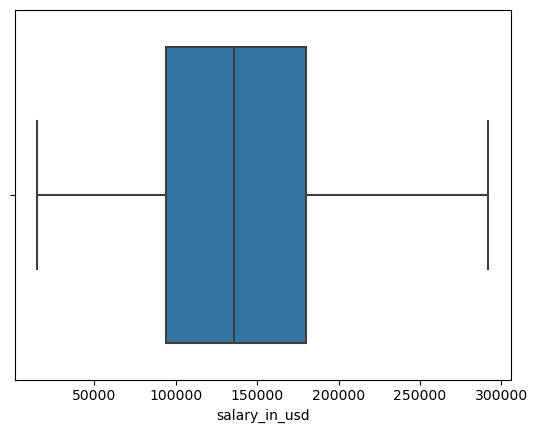

In [113]:
sns.boxplot(data=data.salary_in_usd, x=data.salary_in_usd)
plt.show()

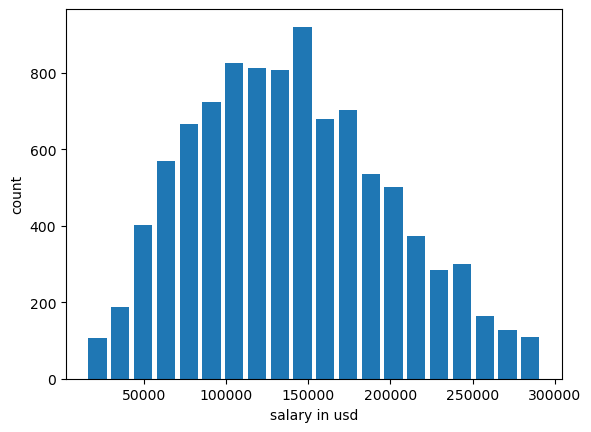

In [114]:
plt.hist(data.salary_in_usd, bins=20, rwidth=0.8)
plt.xlabel('salary in usd')
plt.ylabel('count')
plt.show()

In [115]:
data = data[(data["experience_level"] == "SE") | (data["experience_level"] == "MI") | (data["experience_level"] == "EN") | (data["experience_level"] == "EX")]
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16528,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [116]:
data = data[(data.job_title == "Data Scientist") | (data.job_title == "Data Analyst") | (data.job_title == "Data Engineer") | (data.job_title == "Machine Learning Engineer") | (data.job_title == "Research Scientist")]
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16522,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
16523,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S
16525,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
16527,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L


In [117]:
data = data[(data.employee_residence == "US") | (data.employee_residence == "GB") | (data.employee_residence == "CA") | (data.employee_residence == "ES")]
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16517,2021,MI,FT,Data Scientist,73000,USD,73000,US,0,US,L
16520,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
16521,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
16522,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M


In [118]:
data = data[(data.company_location == "US") | (data.company_location == "GB") | (data.company_location == "CA") | (data.company_location == "ES")]
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16517,2021,MI,FT,Data Scientist,73000,USD,73000,US,0,US,L
16520,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
16521,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
16522,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M


## Encoding

In [119]:
data["job_title"] = data["job_title"].map({"Data Scientist": 0, "Data Analyst": 1, "Data Engineer": 2, "Machine Learning Engineer": 3, "Research Scientist": 4})
data["experience_level"] = data["experience_level"].map({"SE": 0, "MI": 1, "EN": 2, "EX": 3})
data["company_location"] = data["company_location"].map({"US": 0, "GB": 1, "CA": 2, "ES": 3})
data["employee_residence"] = data["employee_residence"].map({"US": 0, "GB": 1, "CA": 2, "ES": 3})

data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2024,0,FT,2,130500,USD,130500,0,0,0,M
3,2024,0,FT,2,96000,USD,96000,0,0,0,M
4,2024,0,FT,3,190000,USD,190000,0,0,0,M
5,2024,0,FT,3,160000,USD,160000,0,0,0,M
8,2024,2,FT,1,101520,USD,101520,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...
16517,2021,1,FT,0,73000,USD,73000,0,0,0,L
16520,2020,1,FT,0,118000,USD,118000,0,100,0,M
16521,2020,1,FT,0,138350,USD,138350,0,100,0,M
16522,2020,1,FT,2,130800,USD,130800,3,100,0,M


## Select Featuries

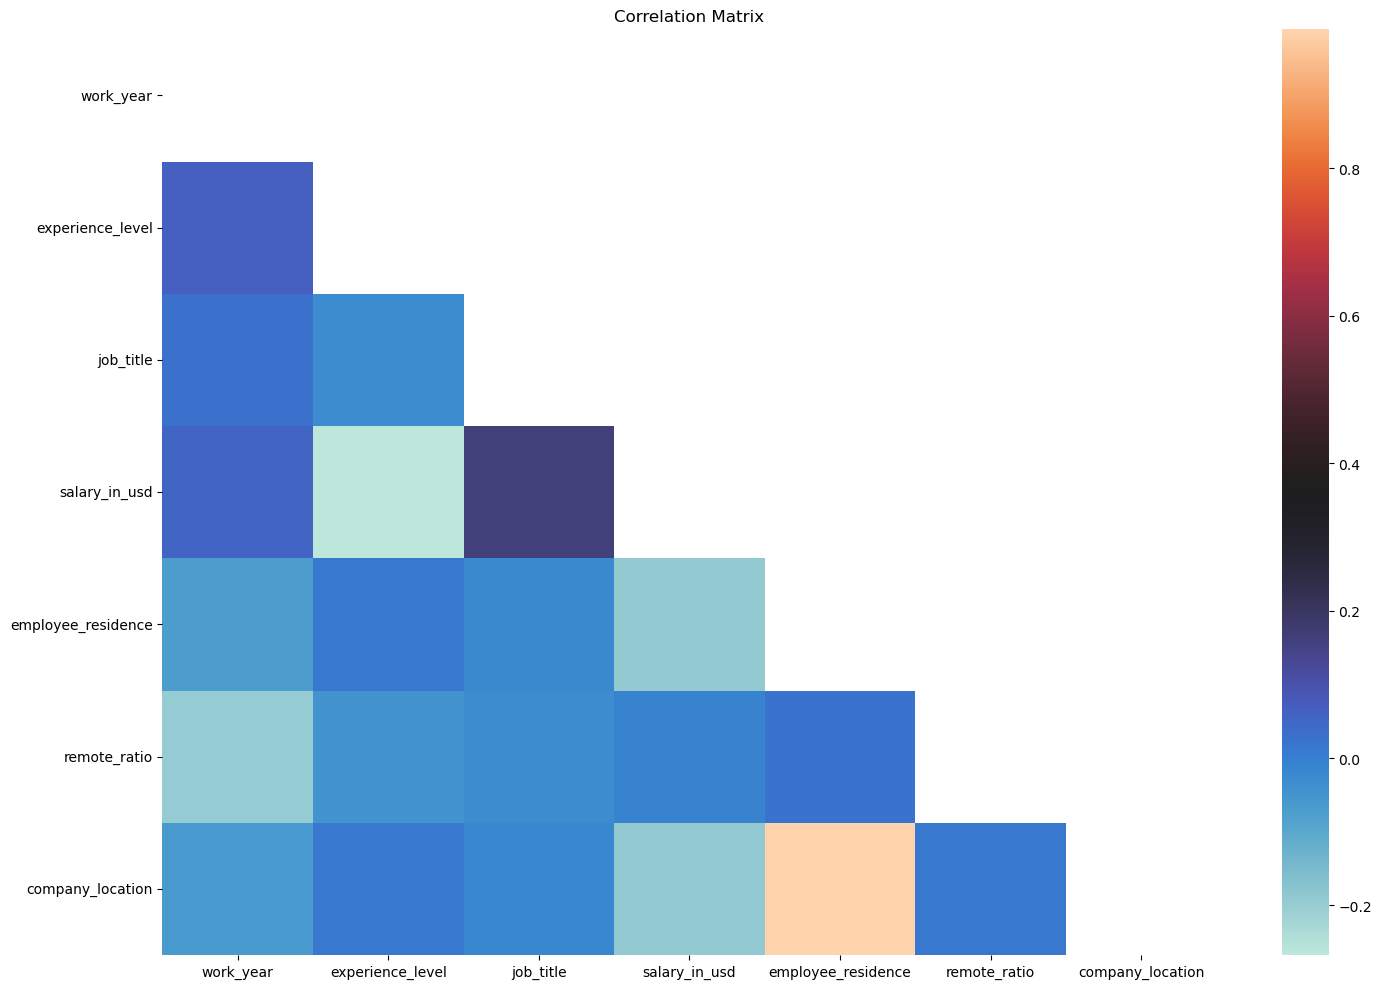

In [121]:
# Plotting a correlation matrix to see the relationship
corr = data.drop(columns=["salary", "salary_currency", "employment_type", "company_size"], axis=1).corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [122]:
# drop unnecessary columns
data.drop(columns=["salary", "salary_currency", "company_size", "remote_ratio", "employment_type", "work_year"] ,axis=1 ,inplace=True)

In [123]:
data

,experience_level,job_title,salary_in_usd,employee_residence,company_location
2,0,2,130500,0,0
3,0,2,96000,0,0
4,0,3,190000,0,0
5,0,3,160000,0,0
8,2,1,101520,0,0
...,...,...,...,...,...
16517,1,0,73000,0,0
16520,1,0,118000,0,0
16521,1,0,138350,0,0
16522,1,2,130800,3,0


## Train Test Split

In [124]:
X = data.drop(columns=["salary_in_usd"], axis=1)
X

,experience_level,job_title,employee_residence,company_location
2,0,2,0,0
3,0,2,0,0
4,0,3,0,0
5,0,3,0,0
8,2,1,0,0
...,...,...,...,...
16517,1,0,0,0
16520,1,0,0,0
16521,1,0,0,0
16522,1,2,3,0


In [125]:
y = data["salary_in_usd"]
y

2        130500
3         96000
4        190000
5        160000
8        101520
          ...  
16517     73000
16520    118000
16521    138350
16522    130800
16531    105000
Name: salary_in_usd, Length: 5709, dtype: int64

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4567, 4), (1142, 4), (4567,), (1142,))

## Model Buliding

In [127]:
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of each tree
}

# Instantiate the XGBRegressor
xgb_reg = XGBRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best estimator from the grid search
best_xgb_reg = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


## Evaluate the Model

In [128]:
# Make predictions on the test set
y_pred = best_xgb_reg.predict(x_test)

# Calculate evaluation metrics
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-score:", r2)

Mean Squared Error: 2102881945.2316368
R-score: 0.35590963129279896


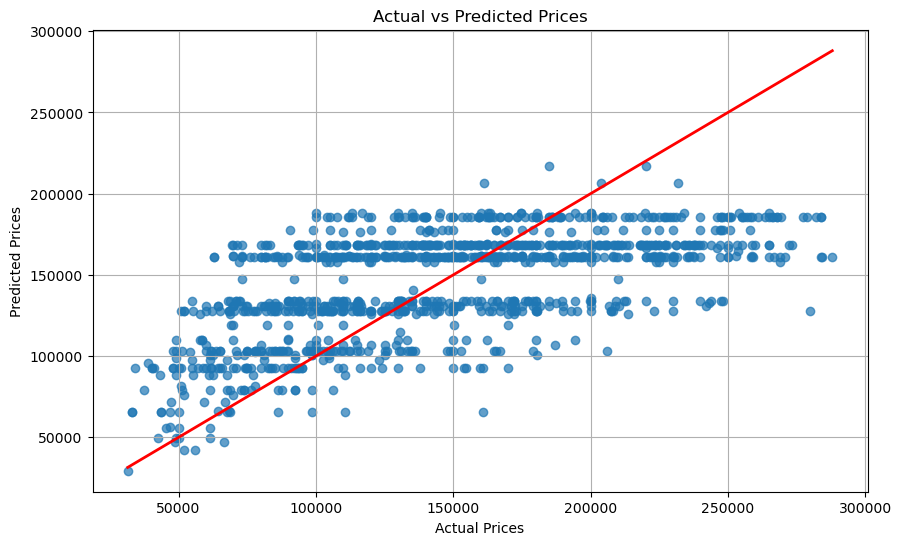

In [129]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.grid(True)
plt.show()

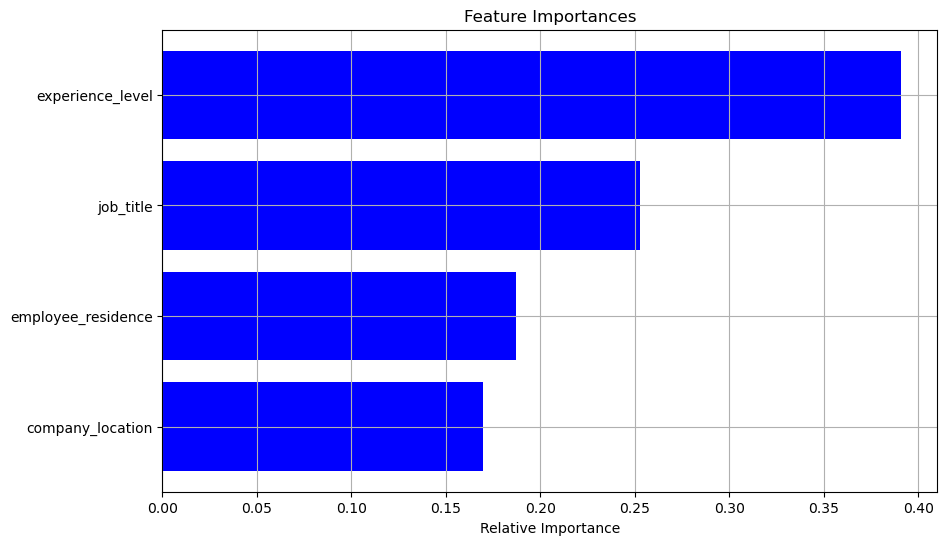

In [130]:
# Plot feature importances
importances = best_xgb_reg.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(True)
plt.show()

## Save The Model

In [131]:
best_xgb_reg.save_model("xgb_salary_prediction_model.json")

## Load XGB Model and Make Prediction

In [132]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model.load_model("xgb_salary_prediction_model.json")

In [133]:
xgb_model.predict([[6, 9, 11, 6]])

array([142735.88], dtype=float32)